In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [ ]:
df = pd.read_csv("D:/PROJECTS/Version Control/ExpenX/data/expense_categorization_dataset.csv")

In [11]:
print("Total Records:", len(df))
print("Null Values:\n", df.isnull().sum())
print("Unique Categories:", df['category'].nunique())
print("Categories:\n", df['category'].value_counts())

Total Records: 1070
Null Values:
 description    0
category       0
dtype: int64
Unique Categories: 10
Categories:
 category
Entertainment       560
Health & Fitness    104
Food                 89
Maintenance          81
Insurance            81
Utility              61
Payroll              36
Rent                 33
Benefits             13
Subscription         12
Name: count, dtype: int64


In [12]:
df.head()

,description,category
0,Monthly rent payment,Rent
1,Apartment complex maintenance fee,Maintenance
2,Electricity bill,Utility
3,Groceries purchased at local market,Food
4,Gym membership dues,Health & Fitness


In [2]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    text = text.strip()
    return text

In [14]:
df['description_clean'] = df['description'].astype(str).apply(clean_text)

In [15]:
df[['description', 'description_clean', 'category']].head()

,description,description_clean,category
0,Monthly rent payment,monthly rent payment,Rent
1,Apartment complex maintenance fee,apartment complex maintenance fee,Maintenance
2,Electricity bill,electricity bill,Utility
3,Groceries purchased at local market,groceries purchased at local market,Food
4,Gym membership dues,gym membership dues,Health & Fitness


In [16]:
df.to_csv("D:/PROJECTS/Version Control/ExpenX/data/cleaned_expenses.csv", index=False)

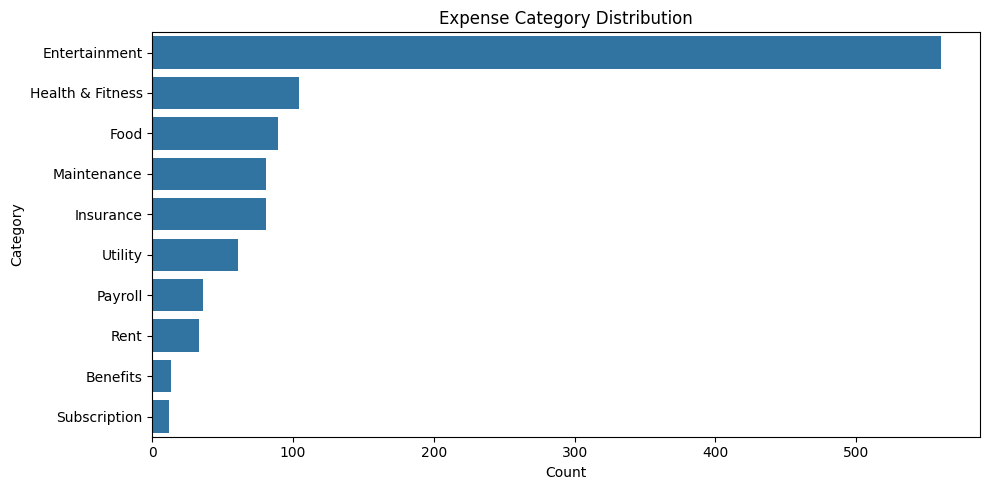

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="category", order=df['category'].value_counts().index)
plt.title("Expense Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
import random

# Define rich template variations for each underrepresented category
synthetic_samples = {
    "Benefits": [
        "Provident fund employer share",
        "Gratuity payment for employee retention",
        "Contribution to employee pension scheme",
        "Company-paid medical insurance contribution",
        "Children education allowance reimbursement",
        "Performance-linked bonus plan benefit",
        "Leave travel concession payment",
        "Employer contribution to NPS account",
        "Wellness allowance credited",
        "Holiday gift vouchers for staff",
        "Relocation allowance paid to employee",
        "Reimbursement of educational expenses"
        "Employer contribution to health plan",
        "Provident fund employer share",
        "Retirement savings match",
        "Gratuity payment",
        "Medical allowance reimbursement",
        "Children education allowance",
        "Leave travel allowance",
        "Bonus meal coupons"
    ],
    "Subscription": [
        "Monthly subscription to Spotify Premium",
        "Yearly payment for Adobe Creative Cloud",
        "Online course subscription from Coursera",
        "Monthly Kindle Unlimited subscription",
        "DTH plan renewal payment",
        "Amazon Prime membership fee",
        "Online fitness training subscription",
        "Cloud storage plan auto-renewal",
        "Language learning platform fee",
        "Stock trading tool subscription",
        "Virtual private network (VPN) plan",
        "Newsletter premium access subscription"
        "Monthly Netflix subscription",
        "Annual antivirus subscription",
        "Online magazine subscription fee",
        "Spotify family plan",
        "Cloud storage plan renewal",
        "Adobe software monthly fee",
        "Online learning platform payment",
        "Language learning app subscription"
    ],
    "Rent": [
        "Monthly rent paid for apartment",
        "Workspace lease fee for co-working space",
        "Flat rental to property owner",
        "Office rental charges paid via UPI",
        "House rent through bank transfer",
        "PG accommodation charges",
        "Monthly lease for storage unit",
        "Garage space rent transfer",
        "Rental payment for commercial property",
        "Villa rent settlement for July",
        "Studio apartment rent auto-debited",
        "Bungalow lease payment for employee housing"
        "Flat rent paid to owner",
        "Office space lease payment",
        "Co-working space monthly rent",
        "PG accommodation fee",
        "Monthly house rent",
        "Hostel room fee",
        "Garage rent transfer"
    ],
    "Payroll": [
        "Employee salary for August credited",
        "Stipend disbursed to summer interns",
        "Consultant fee payment",
        "Contract staff wages released",
        "Sales commission for Q2",
        "Final settlement for resigned employee",
        "Executive bonus payout",
        "Freelancer payment for project work",
        "Monthly salary credited to bank",
        "Overtime payment for factory workers",
        "Reimbursement for business travel",
        "Marketing team incentive bonus"
        "Employee salary for July",
        "Performance bonus disbursed",
        "Intern stipend credited",
        "Monthly wages for workers",
        "Manager salary credited",
        "Sales team commission payout"
    ],
    "Utility": [
        "Electricity bill payment via net banking",
        "Monthly broadband service charges",
        "Postpaid mobile plan renewal",
        "Municipal water tax bill paid",
        "Utility charges for gas cylinder refill",
        "Apartment society electricity dues",
        "Internet bill auto-debit",
        "Landline phone service fee",
        "Cable TV subscription payment",
        "Electricity reconnection fee",
        "Mobile plan recharge with add-on data",
        "Utility payment using credit card"
        "Water supply bill payment",
        "Broadband service bill",
        "Mobile recharge postpaid plan",
        "Landline bill payment",
        "Municipal water charges",
        "Electricity usage bill"
        "Water supply bill payment"
        "Monthly electricity usage charges"
        "Postpaid mobile bill"
        "Gas cylinder booking and payment"
        "Broadband internet monthly charge"
        "DTH TV subscription recharge"
        "Landline phone bill"
        "Prepaid electricity recharge"
        "House cleaning service charges"
        "Monthly garbage disposal fee"
        "Digital cable recharge"
        "Electricity meter maintenance charge"
        "Solar power usage adjustment"
        "Mobile data top-up"
        "UPI charge for utility payments"
    ],
    "Insurance": [
        "Life insurance annual premium",
        "Vehicle insurance policy renewal",
        "Health insurance for family members",
        "Two-wheeler policy premium",
        "Term insurance quarterly premium",
        "Personal accident insurance cover fee",
        "Medical insurance top-up plan",
        "Critical illness policy payment",
        "Employee group insurance premium",
        "Travel insurance before vacation",
        "Car insurance via bank account",
        "Home insurance through UPI"
        "Two-wheeler insurance premium",
        "Home insurance annual payment",
        "Health top-up premium",
        "Life insurance EMI",
        "Critical illness insurance fee"
    ],
    "Maintenance": [
        "Elevator maintenance service charges",
        "Plumbing repairs for apartment",
        "Pest control treatment charges",
        "Common area cleaning maintenance fee",
        "Society monthly maintenance fund",
        "Generator service fee for backup power",
        "Garden landscaping and upkeep charges",
        "Building painting and repairs",
        "Security system AMC payment",
        "HVAC system check-up",
        "Swimming pool maintenance fee",
        "Water tank cleaning services"
        "Building repair charges",
        "Lift maintenance fund",
        "Security system maintenance",
        "Pest control service charges",
        "Apartment plumbing maintenance"
    ],
    "Food": [
        "Dinner at a local restaurant",
        "Monthly grocery shopping at supermarket",
        "Breakfast at office canteen",
        "Snacks from street vendor",
        "Online food delivery from Zomato",
        "Beverages purchased at cafe",
        "Lunch during office hours",
        "Grocery items bought with UPI",
        "Midnight pizza order",
        "Café coffee and dessert",
        "Monthly ration from grocery mart",
        "Fruit and vegetable market purchase"
        "Snacks from grocery store",
        "Lunch at food court",
        "Breakfast from café",
        "Online food delivery",
        "Monthly grocery stock"
        "Lunch at a fast-food outlet"
        "Snacks purchased at a supermarket"
        "Coffee and pastries from a cafe"
        "Weekly vegetable market purchase"
        "Breakfast at a hotel"
        "Food delivery from Swiggy"
        "Restaurant bill for family dinner"
        "Ordered pizza online"
        "Packaged groceries from D-Mart"
        "Grocery shopping at Big Bazaar"
        "Fruit and dairy shopping"
        "Monthly food ration"
        "Items bought from a local bakery"
        "Meat and fish market shopping"
        "Dinner with friends at restaurant"
        "Late-night snacks from Zomato"
        "Takeaway biryani from local eatery"
        "Sweet and dessert purchase"
        "Grocery order via Amazon Fresh"
        "Monthly grocery restock"
        
    ]
}

In [23]:
# Expand to required number
def expand_samples(category, count):
    base = synthetic_samples[category]
    return [{"description": random.choice(base), "category": category} for _ in range(count)]


In [24]:
# Total required
required_counts = {
    "Food": 60,
    "Maintenance": 30,
    "Insurance": 30,
    "Utility": 50,
    "Payroll": 70,
    "Rent": 70,
    "Benefits": 90,
    "Subscription": 90
}

In [25]:
# Generate all
synthetic_data = []
for cat, count in required_counts.items():
    synthetic_data.extend(expand_samples(cat, count))

In [26]:
# Create DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

In [27]:
# Shuffle for natural look
synthetic_df = synthetic_df.sample(frac=1).reset_index(drop=True)

In [29]:
# Save or merge
synthetic_df.to_csv("D:/PROJECTS/Version Control/ExpenX/data/synthetic_expenses.csv", index=False)
synthetic_df.head()

,description,category
0,Annual antivirus subscription,Subscription
1,Studio apartment rent auto-debited,Rent
2,Two-wheeler policy premium,Insurance
3,Personal accident insurance cover fee,Insurance
4,Online food delivery from Zomato,Food


In [9]:
import pandas as pd

cleaned_df = pd.read_csv("D:/PROJECTS/Version Control/ExpenX/data/expense_categorization_dataset.csv")
synthetic_df = pd.read_csv("D:/PROJECTS/Version Control/ExpenX/data/synthetic_expenses.csv")

merged_df = pd.concat([cleaned_df, synthetic_df], ignore_index=True)
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

print("Final Category Distribution:")
print(merged_df['category'].value_counts())

merged_df.to_csv("D:/PROJECTS/Version Control/ExpenX/data/final_expense_dataset.csv", index=False)
merged_df.head()

Final Category Distribution:
category
Entertainment       560
Food                149
Utility             111
Insurance           111
Maintenance         111
Payroll             106
Health & Fitness    104
Benefits            103
Rent                103
Subscription        102
Name: count, dtype: int64


,description,category
0,Final settlement for resigned employee,Payroll
1,Live music events,Entertainment
2,Amazon Prime membership fee,Subscription
3,Health insurance premium,Insurance
4,Beverage,Food


In [10]:
print("Total Records:", len(merged_df))
print("Null Values:\n", merged_df.isnull().sum())
print("Unique Categories:", merged_df['category'].nunique())
print("Categories:\n", merged_df['category'].value_counts())

Total Records: 1560
Null Values:
 description    0
category       0
dtype: int64
Unique Categories: 10
Categories:
 category
Entertainment       560
Food                149
Utility             111
Insurance           111
Maintenance         111
Payroll             106
Health & Fitness    104
Benefits            103
Rent                103
Subscription        102
Name: count, dtype: int64


In [11]:
df = pd.read_csv("D:/PROJECTS/Version Control/ExpenX/data/final_expense_dataset.csv")

In [12]:
df['description_clean'] = df['description'].astype(str).apply(clean_text)

In [13]:
df[['description', 'description_clean', 'category']].head()

,description,description_clean,category
0,Final settlement for resigned employee,final settlement for resigned employee,Payroll
1,Live music events,live music events,Entertainment
2,Amazon Prime membership fee,amazon prime membership fee,Subscription
3,Health insurance premium,health insurance premium,Insurance
4,Beverage,beverage,Food


In [14]:
df.to_csv("D:/PROJECTS/Version Control/ExpenX/data/final_cleaned_expenses.csv", index=False)

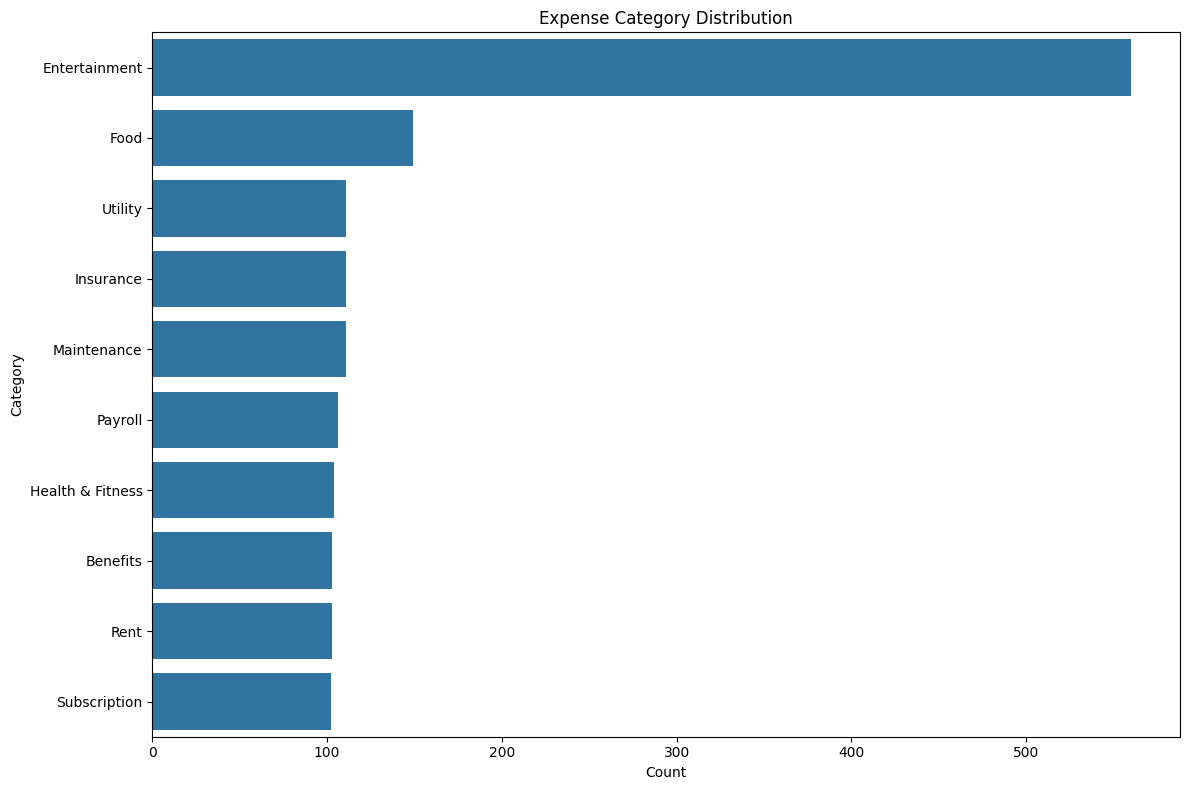

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y="category", order=df['category'].value_counts().index)
plt.title("Expense Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [16]:
df['description_clean'] = df['description'].astype(str).apply(clean_text)